In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [145]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\Statistics\CPSData.csv")
df = df.dropna().reset_index(drop=True)
df

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services
1,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services
2,3,South,Alabama,26620.0,24,Never Married,Male,Bachelor's degree,White,0,57,"Citizen, Native",Employed,Educational and health services
3,3,South,Alabama,26620.0,26,Never Married,Male,High school,White,0,57,"Citizen, Native",Employed,Transportation and utilities
4,2,South,Alabama,33660.0,71,Divorced,Female,High school,White,0,57,"Citizen, Native",Employed,Educational and health services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49391,3,Midwest,Wisconsin,20740.0,47,Married,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Construction
49392,3,Midwest,Wisconsin,20740.0,55,Married,Male,Associate degree,White,0,57,"Citizen, Native",Employed,Construction
49393,1,Midwest,Wisconsin,11540.0,48,Never Married,Male,Bachelor's degree,White,0,57,"Citizen, Native",Employed,Construction
49394,2,Midwest,Wisconsin,20740.0,56,Married,Female,"Some college, no degree",White,0,57,"Citizen, Native",Employed,Manufacturing


In [146]:
df_National = df[(df['EmploymentStatus']=='Unemployed')].reset_index(drop=True)
df_National = df_National.groupby('Married').agg({'Married':['count'],'Age':['mean']})
df_National

,Married,Age
,count,mean
Married,,
Divorced,357,48.518207
Married,1106,46.616637
Never Married,1329,30.758465
Separated,85,42.529412
Widowed,64,58.921875


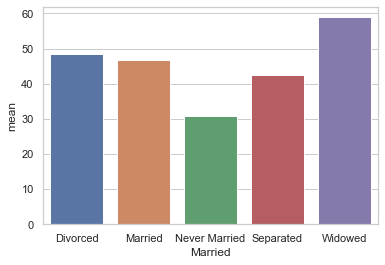

In [147]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df_National.index, y=df_National['Age']['mean'], data=df_National)

In [148]:
divorced = df['Age'][(df['Married']=='Divorced') & (df['EmploymentStatus']=='Unemployed')]
married = df['Age'][(df['Married']=='Married') & (df['EmploymentStatus']=='Unemployed')]
never_married = df['Age'][(df['Married']=='Never Married') & (df['EmploymentStatus']=='Unemployed')]
separated = df['Age'][(df['Married']=='Separated') & (df['EmploymentStatus']=='Unemployed')]
widowed = df['Age'][(df['Married']=='Widowed') & (df['EmploymentStatus']=='Unemployed')]

In [149]:
F, p = stats.f_oneway(divorced.values, married.values, never_married.values, separated.values, widowed.values)

print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  1.1512424111146785e-247
reject null hypothesis


In [152]:
df_National = df[['Married','Sex','Age']][(df['EmploymentStatus']=='Unemployed')].reset_index(drop=True)
df_National

,Married,Sex,Age
0,Never Married,Male,21
1,Never Married,Male,21
2,Never Married,Female,27
3,Divorced,Female,40
4,Never Married,Male,35
...,...,...,...
2936,Never Married,Female,22
2937,Divorced,Female,50
2938,Divorced,Male,48
2939,Never Married,Female,25


In [151]:
df_National

,Married,Sex,Age
0,Never Married,Male,21
1,Never Married,Male,21
2,Never Married,Female,27
3,Divorced,Female,40
4,Never Married,Male,35
...,...,...,...
2936,Never Married,Female,22
2937,Divorced,Female,50
2938,Divorced,Male,48
2939,Never Married,Female,25


In [153]:
df_National = df_National.groupby(['Married','Sex']).agg({'Age':['mean'],'Sex':['count']}).reset_index()
df_National

,Married,Sex,Age,Sex
,,,mean,count
0,Divorced,Female,48.391304,207
1,Divorced,Male,48.693333,150
2,Married,Female,45.136106,529
3,Married,Male,47.974003,577
4,Never Married,Female,30.730419,549
5,Never Married,Male,30.778205,780
6,Separated,Female,41.875000,40
7,Separated,Male,43.111111,45
8,Widowed,Female,59.300000,50


In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Age ~ C(Married) + C(Sex)', data=df_National).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Married),211613.713659,4.0,353.099806,1.960131e-248
C(Sex),965.386007,1.0,6.443394,1.118784e-02
Residual,439738.452648,2935.0,NaN,NaN
